In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
from collections import Counter
import networkx as nx

In [2]:
def generate_1D(wealth_pop, Timesteps, Timeshots=[]):
    wealth_timeshots = []
    neighbours = [-1,1]
    fraction = np.random.rand(Timesteps) # fraction at each step to assign money
    for step in range(Timesteps):  
        position = np.argmin(wealth_pop)
        next_position = position + random.choice(neighbours)
        if next_position == len(wealth_pop):
            next_position = 0
        if next_position == -1:
            next_position = len(wealth_pop)-1
        sum_money = wealth_pop[position] + wealth_pop[next_position]
        e = fraction[step]
        wealth_pop[position] = sum_money*e
        wealth_pop[next_position] = sum_money*(1-e)
        if step in Timeshots:
            wealth_timeshots.append(wealth_pop)
    return [wealth_pop,wealth_timeshots]

In [3]:
def lorenz_curve(wealth_pop):
    sort_wealth = np.sort(wealth_pop)
    wealth_lorenz = sort_wealth.cumsum()/sort_wealth.sum()
    plt.figure(figsize=(6,6))
    plt.scatter(np.arange(wealth_lorenz.size), wealth_lorenz, 
                marker='x', color='coral', s=50)
    plt.plot([0,len(wealth_pop)], [0,1], color='k')
    plt.xlabel('Number of individuls',fontsize=12, weight='bold')
    plt.ylabel('Cumulative wealth',fontsize=12, weight='bold')
    plt.title("Lorenz Curve of the population", fontsize=12, weight='bold')

In [4]:
def longtail_hist(final_wealth):
    plt.hist(final_wealth,bins=100,color='crimson', density=True, )
    plt.xlabel('Individuals Wealth',fontsize=12, weight='bold')
    plt.ylabel('Frequncy',fontsize=12, weight='bold')
    plt.title('Histgram of Wealth',fontsize=12, weight='bold')

In [5]:
def rank_size(final_wealth, start_per=0, end_per=1):
    start = int(len(final_wealth) * start_per)
    end = int(len(final_wealth) * end_per)
    Y = -np.sort(-final_wealth)[start:end] 
    X = np.arange(start,end)+1
    plt.loglog(X,Y,'o', markersize=3.0)
    plt.xlabel('Log rank',fontsize=12, weight='bold')
    plt.ylabel('Log size',fontsize=12, weight='bold')
    plt.title('Log-log of individual wealth (descending order)',fontsize=12, weight='bold')

In [6]:
def cumuper_people(final_wealth):
        sort_dewealth = -np.sort(-final_wealth)
        percentile_people = np.array(list(Counter(sort_dewealth).values()))
        cumuper_people = percentile_people.cumsum()/len(final_wealth)
        plt.figure(figsize=(12,4))
        plt.subplot(121)
        plt.scatter(sort_dewealth,cumuper_people, color='chartreuse')
        plt.xlabel('Wealth',fontsize=12, weight='bold')
        plt.ylabel('Cumulative precentile of people',fontsize=12, weight='bold')
        plt.title('Cumulative percentile of people with decreasing wealth',
                  fontsize=12, weight='bold')        
        plt.subplot(122)
        plt.loglog(sort_dewealth,cumuper_people,'o', markersize=3,color='chartreuse')
        plt.xlabel('log(wealth)',fontsize=12, weight='bold')
        plt.ylabel('Log(cumulative percentile)',fontsize=12, weight='bold')
        plt.title('Log-log cumulative percentile',
                  fontsize=12, weight='bold')

In [7]:
def loglog_top(final_wealth,percentile=0.1):
        sort_dewealth = -np.sort(-final_wealth)
        sort_dewealth = sort_dewealth[:int(len(final_wealth)*percentile)]
        percentile_people = np.array(list(Counter(sort_dewealth).values()))
        cumuper_people = percentile_people.cumsum()/len(final_wealth)
        plt.figure(figsize=(6,6))
        plt.loglog(sort_dewealth,cumuper_people,'o', markersize=3,color='violet')
        plt.xlabel('log(wealth)',fontsize=12, weight='bold')
        plt.ylabel('Log(cumulative percentile)',fontsize=12, weight='bold')
        plt.title('Log-log cumulative percentile',
                  fontsize=12, weight='bold')

In [8]:
Number = 1000
Steps = 1000000
initial_wealth = 1000*np.random.rand(Number) # initialize the wealth at time 0.

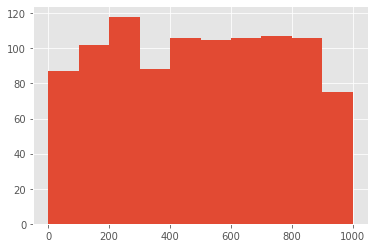

In [9]:
plt.hist(initial_wealth);

In [10]:
final_wealth = generate_1D(initial_wealth,Steps)[0]

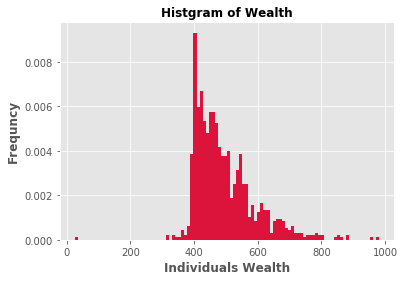

In [11]:
longtail_hist(final_wealth);

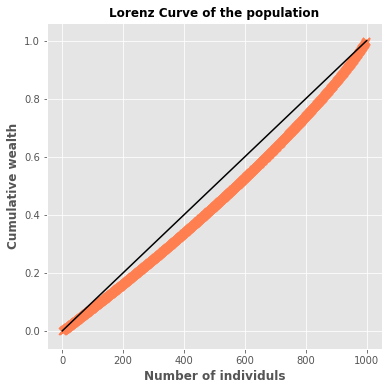

In [12]:
lorenz_curve(final_wealth)

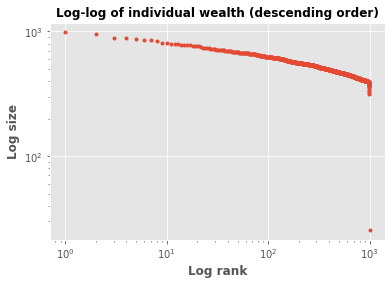

In [13]:
rank_size(final_wealth);

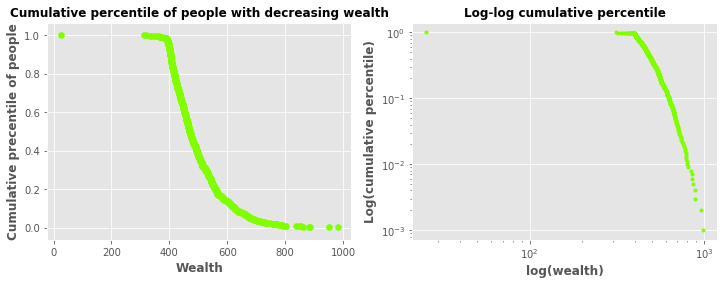

In [14]:
cumuper_people(final_wealth)

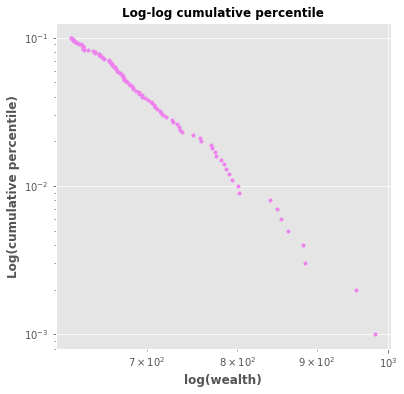

In [15]:
loglog_top(final_wealth)

In [215]:
ax1 = 100
ax2 = 100
Number = ax1*ax2
G2d = nx.grid_2d_graph(ax1,ax2)
initial_wealth = 1000*np.random.rand(Number)

In [216]:
for index, node in enumerate(G2d.nodes()):
    G2d.nodes[node]['wealth']= initial_wealth[index]

In [217]:
def transcations(G2d,Steps):
    fraction = np.random.rand(Steps) 
    for step in range(Steps):
        min_wealth = 1000
        min_position = np.zeros(1)
        for key,values in G2d.nodes.data():
            if values['wealth'] < min_wealth:
                min_wealth = values['wealth']
                min_position = key
            
        neighbours = list((dict(G2d.adj[min_position]).keys()))
        neigh_list = np.arange(len(neighbours))
        neigh_position = neighbours[np.random.choice(neigh_list)]
        e = fraction[step]
        sum_wealth = G2d.nodes[min_position]['wealth']+ G2d.nodes[neigh_position]['wealth']
        G2d.nodes[min_position]['wealth'] = sum_wealth*e
        G2d.nodes[neigh_position]['wealth'] = sum_wealth*(1-e)
    
    return G2d


In [218]:
Steps = 1000000
final_G2d = transcations(G2d,Steps)

In [219]:
final_wealth_list = list(dict(final_G2d.nodes.data()).values())

In [220]:
final_wealth2d = np.array([x['wealth'] for x in final_wealth_list])

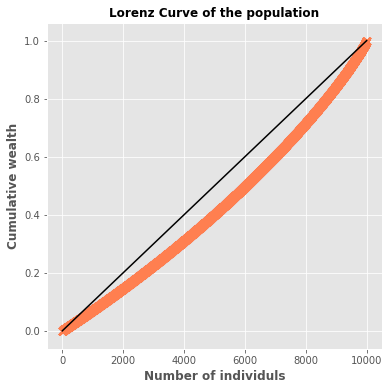

In [221]:
lorenz_curve(final_wealth2d)

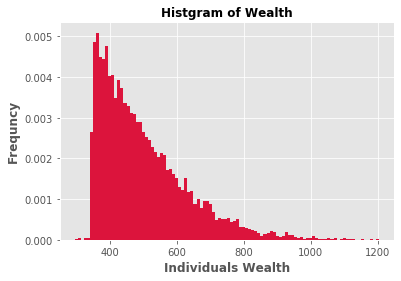

In [222]:
longtail_hist(final_wealth2d)

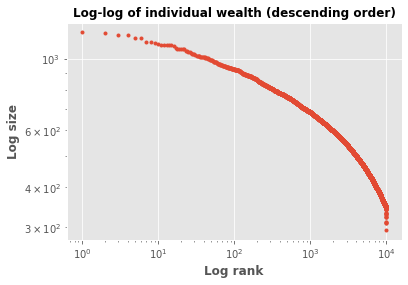

In [223]:
rank_size(final_wealth2d)

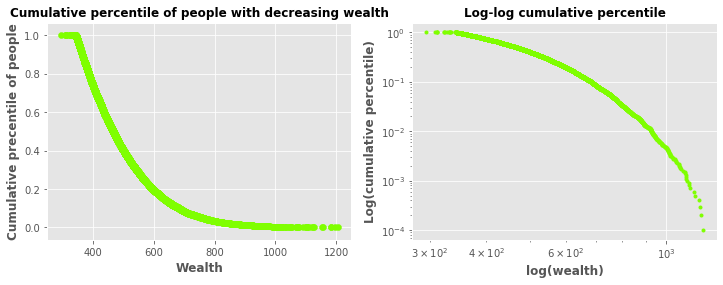

In [224]:
cumuper_people(final_wealth2d)

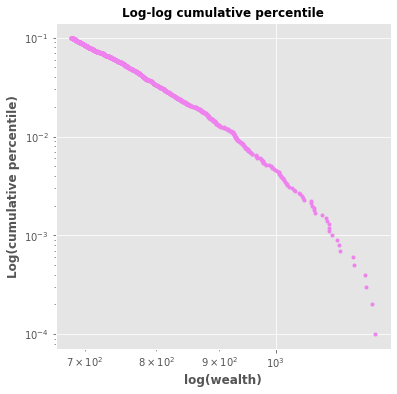

In [226]:
loglog_top(final_wealth2d,percentile=0.1)